# Build system to detect hate speech.


![Unknown.png](attachment:Unknown.png)

# Objective: -



The goal of this challenge is to build system to detect hate speech.

There is no legal definition of hate speech because people’s opinions cannot easily be classified as hateful or offensive. Nevertheless, the United Nations defines hate speech as any type of verbal, written or behavioural communication that can attack or use discriminatory language regarding a person or a group of people based on their identity based on religion, ethnicity, nationality, race, colour, ancestry, gender or any other identity factor.

Hope you now have understood what hate speech is. Social media platforms need to detect hate speech and prevent it from going viral or ban it at the right time.



# Dataset: -

The dataset I’m using for the hate speech detection task is downloaded from Kaggle. This dataset was originally collected from Twitter and contains the following columns:

1. index
2. count
3. hate_speech
4. offensive_language
5. neither 
6. class
7. tweet 





# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

import warnings





warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [2]:
#loading the dataset
try:
    df = pd.read_csv('/Users/amitpandey/Downloads/twitter.csv')#Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path") 
    
    


Data read done successfully...


In [3]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [4]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 24783 rows and 7 columns


In [5]:
# lets drop Unnamed: 0 as it's not useful in anyway 

df = df.drop(['Unnamed: 0'], axis =1)

Axis are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0) and the second running horizontally across columns (axis 1).

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [6]:
df.shape

(24783, 6)

#### The df.shape method shows the shape of the dataset. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [8]:
df.iloc[1]

count                                                                 3
hate_speech                                                           0
offensive_language                                                    3
neither                                                               0
class                                                                 1
tweet                 !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [9]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [10]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  1
There names are as follows:  ['tweet']


In [11]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [12]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  5
There names are as follows:  ['count', 'hate_speech', 'offensive_language', 'neither', 'class']


## Step 2 Insights: -

1) We have total 6 features where 1 of them are object type and 5 are int type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Skewness


In [13]:
df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

![Standard-Deviation-ADD-SOURCE-e838b9dcfb89406e836ccad58278f4cd.jpg](attachment:Standard-Deviation-ADD-SOURCE-e838b9dcfb89406e836ccad58278f4cd.jpg)

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [14]:
df.std()

count                 0.883060
hate_speech           0.631851
offensive_language    1.399459
neither               1.113299
class                 0.462089
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [15]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [16]:
std_cal(df, int64_lst)

,normal_value,zero_value
0,5,0


In [17]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

,normal_value,zero_value
0,5,0


zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

![0_5NGAJWo_3-DsLKoV.png](attachment:0_5NGAJWo_3-DsLKoV.png)

![Variance-TAERM-ADD-Source-464952914f77460a8139dbf20e14f0c0.jpg](attachment:Variance-TAERM-ADD-Source-464952914f77460a8139dbf20e14f0c0.jpg)

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [18]:
df.var()

count                 0.779795
hate_speech           0.399236
offensive_language    1.958487
neither               1.239434
class                 0.213526
dtype: float64

#### We can also understand the Variance using the below function.

In [19]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [20]:
var_cal(df, int64_lst)

,normal_value,zero_value
0,5,0


In [21]:
var_cal(df, int64_lst)

,normal_value,zero_value
0,5,0


zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

![1_tjAEMZx_0uIYGUhxEnPXPw.png](attachment:1_tjAEMZx_0uIYGUhxEnPXPw.png)

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [22]:
df.mean()

count                 3.243473
hate_speech           0.280515
offensive_language    2.413711
neither               0.549247
class                 1.110277
dtype: float64

#### We can also understand the mean using the below function. 

In [23]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [24]:
mean_cal(df, int64_lst)

,normal_value,zero_value
0,5,0


In [25]:
mean_cal(df,int64_lst)

,normal_value,zero_value
0,5,0


zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median
![Alg1_14_02_0011-diagram_thumb-lg.png](attachment:Alg1_14_02_0011-diagram_thumb-lg.png)

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.The median will depict that the patient below median is Malignent and above that are Benign.

In [26]:
df.median()

count                 3.0
hate_speech           0.0
offensive_language    3.0
neither               0.0
class                 1.0
dtype: float64

####  We can also understand the median using the below function. 

In [27]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [28]:
median_cal(df, int64_lst)

,normal_value,zero_value
0,5,0


In [29]:
median_cal(df, int64_lst)

,normal_value,zero_value
0,5,0


zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
![Mode-1.png.webp](attachment:Mode-1.png.webp)
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [30]:
df.mode()

,count,hate_speech,offensive_language,neither,class,tweet
0,3.0,0.0,3.0,0.0,1.0,!!! RT @mayasolovely: As a woman you shouldn't...
1,NaN,NaN,NaN,NaN,NaN,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,NaN,NaN,NaN,NaN,NaN,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,NaN,NaN,NaN,NaN,NaN,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,NaN,NaN,NaN,NaN,NaN,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,NaN,NaN,NaN,NaN,NaN,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,NaN,NaN,NaN,NaN,NaN,"you've gone and broke the wrong heart baby, an..."
24780,NaN,NaN,NaN,NaN,NaN,young buck wanna eat!!.. dat nigguh like I ain...
24781,NaN,NaN,NaN,NaN,NaN,youu got wild bitches tellin you lies


In [31]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [32]:
mode_cal(df, list(df.columns))

,normal_value,zero_value,string_value
0,3,2,1


zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

# Null and Nan values

1. **Null Values**


![missing-values.png](attachment:missing-values.png)

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [33]:
df.isnull().sum()

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

As we notice that there are no null values in our dataset.


2. **Nan Values**

![images.png](attachment:images.png)

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [90]:
df.isna().sum()

tweet     0
labels    0
dtype: int64

### As we notice that there are no nan values in our dataset. 

In [35]:
# We have many ways to fill Null/Nan Values as below:

* mean -> average value (for numerical)
* mode -> most repeated value (for categorical)

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

# Count of unique occurences of every value in all categorical value



In [36]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

tweet      !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...          1
RT @MurderHigashi: I cannot be worried 'bout no bitch.                                                                                                1
RT @MrPerfect_22: Most of these niggas go broke for these hoes !!                                                                                     1
RT @MrPOONsoaker: Foh RT @Thotcho: @MrPOONsoaker lmao 6&#8242;0 but I&#8217;m hella skinny so bitches don&#8217;t like me                             1
RT @MrNationWide: fake eyelashes are okay if they look natural, but some of you bitches look like you gonna take flight if you blink too fa&#8230;    1
                                                                                                                                                     ..
But she can shade the shit out a bitch RT @axolROSE: #YourWifeCantRead       

# Skewness 

![Skewness_1.png.webp](attachment:Skewness_1.png.webp)

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [37]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [38]:
float64_cols = ['float64','int64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [39]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,count,3.8652,positive (+ve) skewed
1,hate_speech,2.6605,positive (+ve) skewed
2,offensive_language,0.3401,positive (+ve) skewed
3,neither,2.0783,positive (+ve) skewed
4,class,0.3882,positive (+ve) skewed


In [40]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,5,0,0


We notice with the above results that we have following details:
1. 5 columns is positive skewed.



### Step 3 Insights: - 

With the statistical analysis we have found that the data has 5 columns with +ve skewness 

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

In [41]:
df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


### We will add a new column to this dataset as labels which will contain the values as:

1. Hate Speech 
2. Offensive Language 
3. No Hate and Offensive

In [42]:
df["labels"] = df["class"].map({0: "Hate Speech", 
                                    1: "Offensive Language", 
                                    2: "No Hate and Offensive"})


In [43]:
df

,count,hate_speech,offensive_language,neither,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No Hate and Offensive
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


### Now we will only select the tweet and labels columns for the rest of the task of training a hate speech detection model:




In [44]:

df = df[["tweet", "labels"]]


In [45]:
df

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No Hate and Offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


# Now we will create a function to clean the texts in the tweet column:



In [46]:

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)

In [47]:
df

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate and Offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No Hate and Offensive
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will separate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Model Training




### 1. Now we will separate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Separate target and feature column in X and y variable

# X will be the features
X = np.array(df["tweet"])

# y will be the target variable
y = np.array(df["labels"])



In [49]:
X


array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [50]:
y

array(['No Hate and Offensive', 'Offensive Language',
       'Offensive Language', ..., 'Offensive Language',
       'Offensive Language', 'No Hate and Offensive'], dtype=object)

In [51]:
# Check the shape of X and y variable
X.shape, y.shape

((24783,), (24783,))

### 2. Split dataset into train and test dataset.

In [52]:
cv = CountVectorizer()
X = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.


In the next step we will train our model on the basis of our training and testing data.


# Step 3: Model Training

#### Goal: In this step we are going to train our dataset ondifferent algorithms.


In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only three set of values that is 0: "Hate Speech", 1: "Offensive Language",2: "No Hate and Offensive", So we will use Classification algorithm.

Algorithms we are going to use in this step
 
1. Bernoulli Naive Bayes
2. Linear SVC
3. Decision Tree Classifier


K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn



In [53]:

# Define kfold with 10 split
cv1 = KFold(n_splits=10, shuffle=True, random_state=42)


The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Bernoulli Naive Bayes

Naive Bayes is a supervised machine learning algorithm to predict the probability of different classes based on numerous attributes. It indicates the likelihood of occurrence of an event. Naive Bayes is also known as conditional probability. Bernoulli Naive Bayes is a part of the Naive Bayes family. It is based on the Bernoulli Distribution and accepts only binary values, i.e., 0 or 1. If the features of the dataset are binary, then we can assume that Bernoulli Naive Bayes is the algorithm to be used.


### Train set cross-validation

In [54]:
#Using Bernoulli Naive Bayes algorithm to the Training Set
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()

BNB.fit(X_train, y_train)

BernoulliNB()

In [55]:
#Accuracy check of trainig data

#Get R2 score
BNB.score(X_train, y_train)


0.8550951577933028

In [56]:
#Accuracy check of trainig data

#Get R2 score
BNB.score(X_train, y_train)


0.8550951577933028

# Prediction

Now we will perform prediction on the dataset using Bernoulli Naive Bayes.



In [57]:
# Predict the values on X_test_scaled dataset 
y_predicted = BNB.predict(X_test)


# Various parameters are calculated for analysing the predictions.
1) Confusion Matrix 2) Classification Report 3) Accuracy Score 4) Precision Score 5) Recall Score 6) F1 Score


# Confusion Matrix
A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

![confuse.png.webp](attachment:confuse.png.webp)

This diagram helps in understanding the concept of confusion matrix.

In [58]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [59]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)


Text(21.5, 0.5, 'True Class')

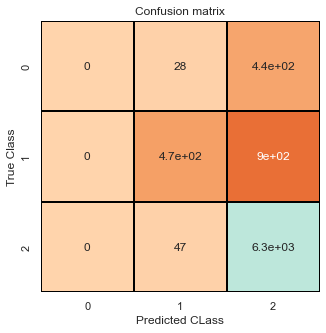

In [60]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

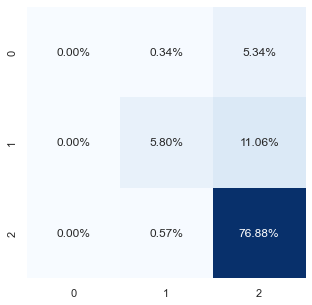

In [61]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

# Evaluating all kinds of evaluating parameters.

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models.

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [62]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is  Bernoulli Naive Bayes")
  
l_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted,average="macro", pos_label="Hate Speech")
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average="macro", pos_label="Hate Speech")
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average="macro", pos_label="Hate Speech")
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is  Bernoulli Naive Bayes

The accuracy is: 0.8267514366059421
The precision is: 0.5625011041163845
The recall is: 0.44543607947147223
The F1-Score is: 0.4640794339137708
Classification Report is:

                       precision    recall  f1-score   support

          Hate Speech       0.00      0.00      0.00       465
No Hate and Offensive       0.86      0.34      0.49      1379
   Offensive Language       0.82      0.99      0.90      6335

             accuracy                           0.83      8179
            macro avg       0.56      0.45      0.46      8179
         weighted avg       0.78      0.83      0.78      8179



# 2. Linear SVC

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. This makes this specific algorithm rather suitable for our uses, though you can use this for many situations.



In [63]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC()

In [64]:
#Accuracy check of trainig data

#Get R2 score
classifier.score(X_train, y_train)


0.9931341845338473

In [65]:
#Accuracy check of trainig data

#Get R2 score
classifier.score(X_train, y_train)


0.9931341845338473

####  Prediction

Now we will perform prediction on the dataset using Linear SVC.




In [66]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)


# Various parameters are calculated for analysing the predictions.
1) Confusion Matrix 2) Classification Report 3) Accuracy Score 4) Precision Score 5) Recall Score 6) F1 Score


# Confusion Matrix
A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

In [67]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [68]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)


Text(21.5, 0.5, 'True Class')

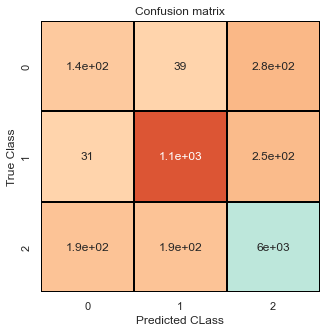

In [69]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

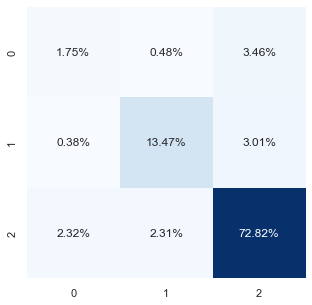

In [70]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

# Evaluating all kinds of evaluating parameters.

In [71]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is  Bernoulli Naive Bayes")
  
k_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted,average="macro", pos_label="Hate Speech")
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average="macro", pos_label="Hate Speech")
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average="macro", pos_label="Hate Speech")
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is  Bernoulli Naive Bayes

The accuracy is: 0.8267514366059421
The precision is: 0.7132852369937952
The recall is: 0.6822767748141855
The F1-Score is: 0.695917161343886
Classification Report is:

                       precision    recall  f1-score   support

          Hate Speech       0.39      0.31      0.34       465
No Hate and Offensive       0.83      0.80      0.81      1379
   Offensive Language       0.92      0.94      0.93      6335

             accuracy                           0.88      8179
            macro avg       0.71      0.68      0.70      8179
         weighted avg       0.87      0.88      0.88      8179



# 3. Decision Tree Classifier

Decision tree is a type of supervised learning algorithm that can be used for both regression and classification problems. The algorithm uses training data to create rules that can be represented by a tree structure. Like any other tree representation, it has a root node, internal nodes, and leaf nodes.

The main advantage of the decision tree classifier is its ability to using different feature subsets and decision rules at different stages of classification. 

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset. In case that there are multiple classes with the same and highest probability, the classifier will predict the class with the lowest index amongst those classes.


In [72]:
#Using  DecisonTreeClassifier Algorithm to the Training Set
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
#Accuracy check of trainig data

#Get R2 score
DTC.score(X_train, y_train)


0.9996386412912551

In [74]:
#Accuracy check of trainig data

#Get R2 score
DTC.score(X_test, y_test)


0.8770020784937034

#### Prediction
Now we will perform prediction on the dataset using Linear Regression.

In [75]:
# Predict the values on X_test_scaled dataset 
y_predicted = DTC.predict(X_test)


# Various parameters are calculated for analysing the predictions.
1) Confusion Matrix 2) Classification Report 3) Accuracy Score 4) Precision Score 5) Recall Score 6) F1 Score


# Confusion Matrix
A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

In [76]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [77]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)


Text(21.5, 0.5, 'True Class')

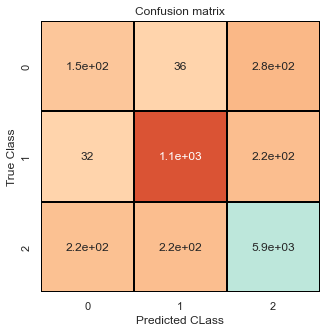

In [78]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot:>

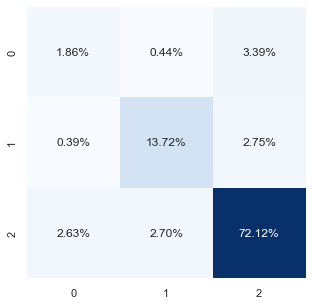

In [79]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

# Evaluating all kinds of evaluating parameters.

In [80]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Decision Tree Classifier ")
  
r_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted,average="macro", pos_label="Hate Speech")
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average="macro", pos_label="Hate Speech")
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average="macro", pos_label="Hate Speech")
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is Decision Tree Classifier 

The accuracy is: 0.8267514366059421
The precision is: 0.705386734112417
The recall is: 0.6905635980614697
The F1-Score is: 0.6972784739348629
Classification Report is:

                       precision    recall  f1-score   support

          Hate Speech       0.38      0.33      0.35       465
No Hate and Offensive       0.81      0.81      0.81      1379
   Offensive Language       0.92      0.93      0.93      6335

             accuracy                           0.88      8179
            macro avg       0.71      0.69      0.70      8179
         weighted avg       0.87      0.88      0.87      8179



# Insight:-

In [81]:

cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Bernoulli Naive Bayes','LinearSVC','DecisionTree ']


cal_metric

,Score in percentage
Bernoulli Naive Bayes,0.826751
LinearSVC,0.880425
DecisionTree,0.877002


* As you can see with our Bernoulli Naive Bayes(87.83%) we are getting a better result even for the recall (0.6991 or 69.91%) which is the most tricky part.
* So we gonna save our model with DecisionTree Classifier.

# Step 4: Save Model


#### Goal:- In this step we are going to save our model in pickel format file.

In [82]:
import pickle 
pickle.dump(BNB, open("HATE_SPEECH_Bernoulli Naive Bayes.pkl", 'wb'))

In [83]:
import pickle 
pickle.dump(classifier, open("HATE_SPEECH_linearSVC.pkl", 'wb'))

In [84]:
import pickle 
pickle.dump(DTC, open("HATE_SPEECH_DecisionTreeClassifier.pkl", 'wb'))

In [85]:
import pickle

def model_prediction(features):
    features = cv.transform([features]).toarray()
    pickled_model = pickle.load(open('HATE_SPEECH_DecisionTreeClassifier.pkl', 'rb'))
    Message = str(list(pickled_model.predict(features)))
    
    return str(f'The Message is {Message}')


In [86]:
Message = "Cows lose their jobs as milk prices drop"

In [87]:
Message_2 = "Let's unite and kill all the people who are protesting against the government"

In [88]:
model_prediction(Message_2)

"The Message is ['Hate Speech']"

In [89]:
model_prediction(Message)

"The Message is ['No Hate and Offensive']"

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. So this is how you can train a machine learning model for the task of detecting hate speech by using the Python programming language. Hate speech is one of the serious issues we see on social media platforms like Twitter and Facebook daily. Most of the posts containing hate speech can be found in the accounts of people with political views. 
